In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
%matplotlib inline
import qbstyles
import plotly.express as px
qbstyles.mpl_style(dark=False  , minor_ticks= False)


# import qbstyles
# qbstyles.mpl_style(False, False)
import warnings
warnings.filterwarnings('ignore')



RAW_DATA_PATH = '/Users/Dennis/Analytics/112_NCCU_DAC/OCard/data/01_raw/'
INTERMEDIATE_DATA_PATH = '/Users/Dennis/Analytics/112_NCCU_DAC/OCard/data/02_intermediate/' 



customer_id =  '用戶編號'
price_var = '單價'
order_date = 'order_date'
order_id = '交易序號'
product_desc = '品項名稱'
quantity_var = '數量'
sales_var = 'sales'
place_desc = '分店'



In [56]:

def clean_brand_name(data):

    remove_brand = ['米塔國際食品', '米塔水餃' ,'米塔精彩迷你鍋' ,'米塔水產海鮮麵','米塔石頭火鍋']

    normalize_brand_name_dict = {
        'Mita Café Bistro': 'Mita CAFE Bistro',
        '洋朵義式廚坊':'洋朵義式廚房',
        '洋朵庭園餐廳':'洋朵義式廚房',
        '洋城義大利餐廳Exisite':'洋城義大利餐廳',
        '洋城義大利餐酒館':'洋城義大利餐廳',
        '千荷田火鍋百匯涮涮鍋':'千荷田蔬食百匯涮涮鍋',
    '千荷田日式涮涮鍋':'千荷田蔬食百匯涮涮鍋',
        '日本橋浜町食事処':'日本橋浜町',
        '湯師傅雙享鍋 ':'湯師傅鍋物專賣',
        '米塔烘焙':'米塔手感烘焙'
    }

    data = data[~data['brand'].isin(remove_brand)]
    data = data.replace({'brand': normalize_brand_name_dict})
    return data

def generate_corr_table(data , display_stats = True):

    cust_freq = data.groupby(customer_id)[order_date].nunique()
    cust_value = data.groupby(customer_id)[sales_var].sum()
    brand_diff = data.groupby(customer_id)['brand'].nunique()
    cust_aov = data.groupby([customer_id , order_id])[sales_var].sum()
    aov_per_cust = cust_aov.reset_index().groupby(customer_id)[sales_var].mean()
    aov_per_cust.name = 'aov'


    point_benefit_df = point_df[point_df['動作'] == '兌點']
    point_benefit_cust = point_benefit_df.groupby(customer_id)['交易序號'].nunique()
    point_vol_cust = point_benefit_df.groupby(customer_id)['點數'].sum()*(-1)

    cust_analysis_df = pd.concat([cust_freq, cust_value, brand_diff , aov_per_cust,point_benefit_cust , point_vol_cust], axis=1).reset_index().rename(columns={order_date: 'frequency', sales_var: 'clv', 'brand': 'brand_diff' , price_var: 'aov', '交易序號': 'point_benefit_exp' , '點數': 'point_vol'})
    if display_stats:
        print(cust_analysis_df.describe())
    return cust_analysis_df



crm_complete_df = pd.read_parquet(INTERMEDIATE_DATA_PATH + 'crm_complete.parquet')
point_df = pd.read_csv(RAW_DATA_PATH + 'impact/point.csv')


crm_complete_df['brand'] = crm_complete_df['分店'].apply(lambda x: x.split('-')[0])
crm_complete_df[sales_var]  = crm_complete_df[price_var] * crm_complete_df[quantity_var]
point_df['brand'] = point_df['分店'].astype(str).apply(lambda x: x.split('-')[0])



crm_complete_df = clean_brand_name(crm_complete_df)
point_df = clean_brand_name(point_df)

point_benefit_df = point_df = point_df[point_df['動作'] == '兌點']
this_brand_df = crm_complete_df[crm_complete_df['brand'] == '集客人間茶館']
this_brand_df

,動作,金額,點數,兌換品項,交易時間,交易序號,用戶編號,品號,品項名稱,單價,數量,分店,會員等級,年齡,性別,會員建立時間,同意加入時間,order_date,brand,sales
5,給點,947.0,9.0,None,2021-03-19 23:47:01,548-2691-2689-183976-20210319234701-202103191051,19R0XnKaRE,000102冷大,檸檬翡翠,125,1,集客人間茶館-台北東興店,網路會員,36.0,女,2019-08-17 12:00:43,2019-08-17 12:03:07,2021-03-19,集客人間茶館,125
6,給點,947.0,9.0,None,2021-03-19 23:47:01,548-2691-2689-183976-20210319234701-202103191051,19R0XnKaRE,000037標準,脆皮炸豆腐,48,1,集客人間茶館-台北東興店,網路會員,36.0,女,2019-08-17 12:00:43,2019-08-17 12:03:07,2021-03-19,集客人間茶館,48
7,給點,947.0,9.0,None,2021-03-19 23:47:01,548-2691-2689-183976-20210319234701-202103191051,19R0XnKaRE,000042標準,大麥克雞塊,68,1,集客人間茶館-台北東興店,網路會員,36.0,女,2019-08-17 12:00:43,2019-08-17 12:03:07,2021-03-19,集客人間茶館,68
8,給點,947.0,9.0,None,2021-03-19 23:47:01,548-2691-2689-183976-20210319234701-202103191051,19R0XnKaRE,000019飯,素 鍋,278,1,集客人間茶館-台北東興店,網路會員,36.0,女,2019-08-17 12:00:43,2019-08-17 12:03:07,2021-03-19,集客人間茶館,278
9,給點,947.0,9.0,None,2021-03-19 23:47:01,548-2691-2689-183976-20210319234701-202103191051,19R0XnKaRE,000859冷大,珍珠奶茶,130,1,集客人間茶館-台北東興店,網路會員,36.0,女,2019-08-17 12:00:43,2019-08-17 12:03:07,2021-03-19,集客人間茶館,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7951428,給點,592.0,5.0,None,2023-02-23 00:00:25,548-2691-2689-3089175-20230223000025-202302221083,X0zJev0pRe,001541標準,78元茶點,0,2,集客人間茶館-台北東興店,VVIP 會員,53.0,男,2019-06-19 23:47:22,2019-06-19 23:47:26,2023-02-23,集客人間茶館,0
7951429,給點,592.0,5.0,None,2023-02-23 00:00:25,548-2691-2689-3089175-20230223000025-202302221083,X0zJev0pRe,001546甜不辣,78元茶點選,0,1,集客人間茶館-台北東興店,VVIP 會員,53.0,男,2019-06-19 23:47:22,2019-06-19 23:47:26,2023-02-23,集客人間茶館,0
7951430,給點,592.0,5.0,None,2023-02-23 00:00:25,548-2691-2689-3089175-20230223000025-202302221083,X0zJev0pRe,001546地瓜薯條,78元茶點選,0,1,集客人間茶館-台北東興店,VVIP 會員,53.0,男,2019-06-19 23:47:22,2019-06-19 23:47:26,2023-02-23,集客人間茶館,0
7951431,給點,592.0,5.0,None,2023-02-23 00:00:25,548-2691-2689-3089175-20230223000025-202302221083,X0zJev0pRe,001545炸豆腐,68元茶點選,0,1,集客人間茶館-台北東興店,VVIP 會員,53.0,男,2019-06-19 23:47:22,2019-06-19 23:47:26,2023-02-23,集客人間茶館,0


In [513]:
def generate_combo(basket , item_combinations):
    for items in item_combinations:
        combo_name = ' + '.join(items)
        combo_collect = []
        for item in items:
            if item in basket:
                combo_collect.append('check')
            else:
                combo_collect.append('uncheck')
        if 'uncheck' in combo_collect:
            combo_name = 'other'
        else:
            return combo_name
    return combo_name

def get_time_between_two_periods(df , time_var, periods):
    mask = (df[time_var] > periods[0]) & (df[time_var] <= periods[1])
    return df[mask]
    


def remove_sparse_items(txn_df , product_desc,threshold = 0.001):

    item_freq = txn_df[product_desc].value_counts(normalize=True)
    non_sparse_item = item_freq[item_freq >threshold]
    txn_df = txn_df[txn_df[product_desc].isin(non_sparse_item.index)]
    return txn_df

def encode(item_freq):
    res = False
    if item_freq > 0:
        res = True
    return res



class MBA_analyzer:
    
    def __init__(self) -> None:
        self.strategic_segment = 'strategic_segment' 
        self.total_metrics = []
        self.assortment_scorecard = None
        self.customer_df = None
        self.basket_df = None 
        self.item_df = None 
        self.rule_df = None
        
        
        
        self.txn_df = None 
        self.txn_id = None
        self.customer_id = None
        self.time_var = None 
        self.item_var = None
        self.price_var = None
        self.quantity_var = None
        self.sales_var = None

        
        self.target_analysis_items = None
        self.attach_items = None
        self.evaluate_metrics = None
        self.baseline_periods = None
        
        self.product_combo = dict()
        
    def setup_mba_data(self, txn_df ,customer_id , time_var , item_var,sales_var, txn_id , price_var , quantity_var):
        self.txn_df = txn_df
        self.txn_id = txn_id
        self.customer_id = customer_id
        self.time_var = time_var
        self.item_var = item_var
        self.price_var = price_var
        self.quantity_var = quantity_var
        self.sales_var = sales_var
        
        
        
        for item in txn_df[item_var].unique():
            self.product_combo[item] = [item]
        

    def setup_mba_analysis(self, target_analysis_items:list, attached_items:list, evaluate_metrics:list, baseline_periods:list , analysis_periods : list , use_target_analysis_items_as_segment = True):
        
        self.target_analysis_items = target_analysis_items
        self.attach_items = attached_items
        self.evaluate_metrics = evaluate_metrics
        self.baseline_periods = baseline_periods
        self.analysis_periods = analysis_periods

    
    def setup_strategic_segment(self, strategic_segment):
        self.strategic_segment = strategic_segment
        

    
    def clean_sparse_items(self, sparse_threshold = 0.005):
        print('cleaning sparse items , original item size : ' , self.txn_df[self.item_var].nunique())
        self.txn_df = remove_sparse_items(self.txn_df ,self.item_var, sparse_threshold)
        print('with threshold = , ' , sparse_threshold , ' after cleansing ->  item size : ' , self.txn_df[self.item_var].nunique())
    
    def _generate_basket_df(self):
        self.basket_df = self.txn_df.groupby(self.txn_id).agg({self.sales_var: 'sum' , self.time_var:'count' , self.item_var: lambda x: list(x)}).reset_index().rename(columns={self.sales_var: 'check size', self.item_var: 'basket' , self.time_var: 'number of items'})
        
    def _geneate_customer_df(self):
        self.customer_df = self.txn_df.groupby(self.customer_id).agg({self.time_var: 'max', self.sales_var: 'sum' , self.txn_id : 'nunique'}).reset_index().rename(columns={self.time_var: 'recency', self.sales_var:'money' , self.txn_id: 'frequency'})

     
    def _generate_initial_item_df(self):
        self.item_df  = self._generate_item_df(self.txn_df)
        
        
    def _generate_item_df(self , txn_df):
        item_basket_df = []
        item_df = txn_df.groupby(self.item_var).agg({self.sales_var: 'sum' , self.txn_id: 'nunique'}).reset_index().rename(columns={self.sales_var: 'sales' , self.txn_id: 'number of orders'})
        
        for item in txn_df[self.item_var].unique():
            contain_this_item_transaction_list = txn_df[txn_df[self.item_var] == item][self.txn_id].unique()
            contain_this_item_transacton = txn_df[txn_df[self.txn_id].isin(contain_this_item_transaction_list)]
            # stats
            avg_check_size = contain_this_item_transacton.groupby(self.txn_id)[self.sales_var].sum().mean()
            self_order = txn_df[txn_df[self.item_var] == item]
            self_avg_check_size = self_order.groupby(self.txn_id)[self.sales_var].sum().mean()
            rest_of_basket_size = avg_check_size - self_avg_check_size
            
            total_item_number = contain_this_item_transacton.groupby(self.txn_id)[self.item_var].nunique()
            
            avg_item_number = total_item_number.mean()
            contain_one_item_transaction = total_item_number[total_item_number == 1].shape[0]
            all_item_transaction = total_item_number.shape[0]
            attach_rate = 1 - contain_one_item_transaction / all_item_transaction
            customer_size = contain_this_item_transacton[self.customer_id].nunique()
            this_item_basket_df = pd.DataFrame({self.item_var: [item] , 'avg check size': [avg_check_size] , 'product' : [self_avg_check_size], 'rest of basket':[rest_of_basket_size] ,  'avg item number': [avg_item_number] , 'attach rate': [attach_rate] , 'customer size':customer_size})
            item_basket_df.append(this_item_basket_df)
        this_item_basket_df = pd.concat(item_basket_df)
        
        item_df = pd.merge(item_df, this_item_basket_df , on=self.item_var , how='left')
        item_df['average rest of check ratio'] = item_df['rest of basket'] / item_df['avg check size']
        item_df['avg frequency'] = item_df['number of orders'] / item_df['customer size']
        item_df = round(item_df[item_df['sales'] >=0],2)
        return item_df
            
            
            
            

    def _define_target_segment_by_target_analysis_items(self):
        temp_df = self.txn_df
        temp_df['strategic_segment'] = temp_df[self.item_var].apply(lambda x: 1 if x in self.target_analysis_items else 0)
        basket_tag = temp_df.groupby(self.txn_id)['strategic_segment'].sum().apply(lambda x: 'strategic order' if x > 0 else 'other')
        self.basket_df = pd.merge(self.basket_df, basket_tag, on=self.txn_id, how='left')
        
        
    def _define_basket_composition(self):
        self.txn_df['basket_composition'] = self.txn_df[self.item_var].apply(lambda x: x if x in self.target_analysis_items + self.attach_items else 'other')

    
    def _define_segment_by_customer(self):

        this_period_customer_behavior = get_time_between_two_periods(self.txn_df , self.time_var , self.baseline_periods)
        purchasing_record_by_customer = pd.pivot_table(this_period_customer_behavior, index=self.customer_id, columns=self.item_var, values=self.txn_id, aggfunc='count').fillna(0)
        # update customer df
        self.customer_df = pd.merge(self.customer_df, purchasing_record_by_customer, on=self.customer_id, how='left').fillna(0)
    
    def build_up_mba_analytics(self , directly_generate_loyalty_metrics = False , directly_generate_basket_metrics = False):
        self._geneate_customer_df()
        self._generate_initial_item_df()
        self._generate_basket_df()
        
        self._define_segment_by_customer()
        self._define_target_segment_by_target_analysis_items()
        self._define_basket_composition()
        
        if directly_generate_loyalty_metrics:
            self.generate_customer_loyalty_rate()
            self.generate_customer_connection_rate()
        if directly_generate_basket_metrics:
            self.generate_basket_analysis_table()
        
    
    def add_product_combo(self, main_product:str, combo_product:list):
        self.product_combo[main_product] = self.product_combo[main_product] + combo_product
        print('successfully add product combo {} for {} '.format(combo_product, main_product))
        
    
    
    def generate_customer_connection_rate(self,baseline_periods = [], analysis_periods = []):
        baseline_periods, analysis_periods = self._init_period_params( baseline_periods, analysis_periods)
        
        connection_rate_df = []
        product_combo = self.product_combo
        baseline_period_customer_behavior = get_time_between_two_periods(self.txn_df , self.time_var , baseline_periods)
        analysis_period_customer_behavior = get_time_between_two_periods(self.txn_df , self.time_var , analysis_periods)
        for item in self.txn_df[self.item_var].unique():
            this_product_recognized_return = product_combo[item]
            has_purchase_this_item_customer_list = baseline_period_customer_behavior[baseline_period_customer_behavior[self.item_var] == item][self.customer_id].unique()
            this_item_segment_behavior_in_analysis_period = analysis_period_customer_behavior[analysis_period_customer_behavior[customer_id].isin(has_purchase_this_item_customer_list)]
            
            customer_size = len(has_purchase_this_item_customer_list)
            if customer_size == 0:
                temp_df = pd.DataFrame({item : 0}, index = [0])
                continue
            return_customer_size = this_item_segment_behavior_in_analysis_period[this_item_segment_behavior_in_analysis_period[self.item_var].isin(this_product_recognized_return)][customer_id].nunique()
            connection_rate = return_customer_size / customer_size
            temp_df = pd.DataFrame({item : connection_rate}, index = [0])
            connection_rate_df.append(temp_df)
        connection_rate_df = pd.concat(connection_rate_df, axis=1).T.reset_index()
        connection_rate_df.columns = [self.item_var, 'connection_rate']
        self.item_df = pd.merge(self.item_df, connection_rate_df, on=self.item_var, how='left')
        print('Successfully generate customer connection rate')
        
    def generate_customer_loyalty_rate(self , loyalty_frequency_threshold = 3):
        loyalty_ratio_df = []
        for item in self.txn_df[self.item_var].unique():
            this_item_df = self.txn_df[self.txn_df[self.item_var] == item]
            this_item_df = this_item_df.groupby(self.customer_id).agg({self.txn_id: 'nunique'}).rename(columns={self.txn_id: 'frequency'})
            
            total_customer_size = this_item_df.shape[0]
            loyalty_customer_size = this_item_df[this_item_df['frequency'] > loyalty_frequency_threshold].shape[0]
            
            loyalty_ratio = loyalty_customer_size / total_customer_size
            loyalty_ratio_df.append(pd.DataFrame({item : loyalty_ratio} , index= [0]))
        loyalty_ratio_df = pd.concat(loyalty_ratio_df, axis=1).T.reset_index()
        
        loyalty_ratio_df.columns = [self.item_var , 'loyalty_ratio']
        self.item_df = pd.merge(self.item_df, loyalty_ratio_df, on=self.item_var, how='left')
        print('Successfully generate customer loyalty rate')
        
    
    def generate_basket_analysis_table(self  , min_suport = 0.001):
    
        txn_df = self.txn_df


        basket_df = pd.crosstab(txn_df[order_id], txn_df[product_desc])    
        basket_df = basket_df.applymap(encode)
        frequent_itemsets = apriori(basket_df, min_support=min_suport, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="lift").sort_values(["support", "confidence","lift"],axis = 0, ascending = False)
        rules['antecedents'] = rules['antecedents'].apply(lambda x : list(x)[0])
        rules['consequents'] = rules['consequents'].apply(lambda x : list(x)[0])
        apt_define_cols = {
            'confidence':'Attach Rate',
            'lift':'Affinity',
            'antecedent support':'Base Category Frequency',
            'consequent support':'Attach Category Frequency',
            'support':'Pair Frequency',
            'antecedents':'Base Category',
            'consequents':'Attached Category'    
        }

        rules.rename(columns=apt_define_cols, inplace=True)
        self.rule_df = rules
        
    def _generate_basket_sales_composition_data(self, txn_df):
        sales_per_transaction = pd.pivot_table(txn_df, index=self.txn_id, columns='basket_composition', values=self.sales_var, aggfunc='mean').mean()
        count_of_transaction = txn_df[self.txn_id].nunique()
        return sales_per_transaction, count_of_transaction
        

    
    def plot_basket_insights(self,txn_df = None, composition_var = 'default' , normalize = False):
        if txn_df is None:
            txn_df = self.txn_df
        if composition_var == 'default':
            composition_var = self.strategic_segment
        
        to_display_composition = []
        to_display_counts = []
        
        for segment in txn_df[composition_var].unique():
            sales_per_transaction, count_of_transaction = self._generate_basket_sales_composition_data(txn_df[txn_df[composition_var] == segment])
            to_display_composition.append(pd.DataFrame({segment : sales_per_transaction}))
            to_display_counts.append(pd.DataFrame({segment : count_of_transaction} , index = [0]))
        to_display_composition = pd.concat(to_display_composition, axis=1)
        to_display_counts = pd.concat(to_display_counts, axis=1)
        
        to_display_composition = to_display_composition.T.dropna(how='all')
            
        to_display_composition = to_display_composition[self.target_analysis_items + self.attach_items + ['other']]

        fig = to_display_composition.plot(kind='barh' , stacked=True , figsize = (8,3))
        # annotation
        fig.set_xlabel('Sales $ per Transaction')
        fig.set_ylabel('Composition')
        for p in fig.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            if normalize:
                display_width = width / to_display_composition.T.sum().max()
                fig.annotate('{:.1%}'.format(display_width), (x + width/2, y + height/2), ha='center', va='center')
            else:
                fig.annotate('{:.0f}'.format(width), (x + width/2, y + height/2), ha='center', va='center')
        to_display_counts = to_display_counts[to_display_composition.index]
        # annotate the count of transaction on the right y-axis
        for i, v in enumerate(to_display_composition.T.sum()):
            txn_count = to_display_counts.T.values[i][0]
            fig.annotate('{:.0f}'.format(txn_count), (v*1.1 , i), ha='right', va='center', color='black')
        fig.set_xlim(0, to_display_composition.T.sum().max()*1.5)
        plt.title('Evaluate Check Composition')
        plt.ylabel('# of Transactions')
        return to_display_composition
    
    def plot_breakdown_metric(self, breakdown_by, target_item = None):
        if target_item ==None:
            target_item = self.target_analysis_items[0]
        breakdown_df = []
        segment_list = list(self.txn_df[breakdown_by].unique())
        try:
            segment_list.remove(None)
        except:
            print('No None value in the segment list')
        print('start breakdown ... ' , segment_list)
        for segment in segment_list:
            try:
                segment_df = self.txn_df[self.txn_df[breakdown_by] == segment]
                segment_item_df = self._generate_item_df(segment_df)
                target_segment_item_df = segment_item_df[segment_item_df[self.item_var] == target_item]
                target_segment_item_df['segment'] = segment
                breakdown_df.append(target_segment_item_df)
            except:
                print(segment + ' is not in the data')
                continue
        breakdown_data = pd.concat(breakdown_df).set_index('segment')
        bc = list(breakdown_data.columns)
        bc.remove(self.item_var)

        # 计算要创建的子图数量
        num_plots = len(bc)

        # 每行最多三个子图
        plots_per_row = 3

        # 计算行数
        num_rows = (num_plots + plots_per_row - 1) // plots_per_row

        # 创建子图
        fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(15, 5*num_rows))

        # 将子图对象展平，以便在循环中访问
        axs = axs.flatten()

        for i, col in enumerate(bc):
            # 在每个子图中绘制柱状图
            ax = axs[i]
            ax.bar(breakdown_data.index, breakdown_data[col])
            ax.set_title(col)
            
            # 在每个柱状图的顶部标注数字
            for x, y in enumerate(breakdown_data[col]):
                ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')
            
            # 绘制平均虚线
            ax.axhline(y=breakdown_data[col].mean(), color='r', linestyle='--')

        # 隐藏未使用的子图
        for i in range(num_plots, num_rows * plots_per_row):
            fig.delaxes(axs[i])

        # 调整子图之间的间距
        plt.tight_layout()
        plt.show()

    def plot_trigger_loyalty_items(self,following_items = [] , baseline_periods = [], analysis_periods = [], method = 'freq'):
        
        product_combo = self.product_combo
        
        baseline_periods, analysis_periods = self._init_period_params( baseline_periods, analysis_periods)
        
        if following_items == []:
            following_items = self.txn_df[self.item_var].unique()  
        
        
        baseline_period_customer_behavior = get_time_between_two_periods(self.txn_df , self.time_var , baseline_periods)
        analysis_period_customer_behavior = get_time_between_two_periods(self.txn_df , self.time_var , analysis_periods)
        sequence_curves = []
        all_item_base = []
        for item in following_items:
            this_product_recognized_return = product_combo[item]
            
            has_purchase_this_item_customer_list = baseline_period_customer_behavior[baseline_period_customer_behavior[self.item_var] == item][self.customer_id].unique()
            # 有在分析期間購買產品的顧客
            this_item_segment_behavior_in_analysis_period = analysis_period_customer_behavior[analysis_period_customer_behavior[customer_id].isin(has_purchase_this_item_customer_list)]
            recognized_purchase_behavior = this_item_segment_behavior_in_analysis_period[this_item_segment_behavior_in_analysis_period[self.item_var].isin(this_product_recognized_return)]
            
            # 顧客大小
            all_item_base.append(pd.DataFrame({item:len(has_purchase_this_item_customer_list)} , index = [0]))
            if method == 'freq':
                purchase_sequence = pd.pivot_table(recognized_purchase_behavior , index = self.customer_id , values = self.txn_id , columns = self.time_var , aggfunc = 'nunique')
            elif method == 'amount':
                purchase_sequence = pd.pivot_table(recognized_purchase_behavior , index = self.customer_id , values = self.sales_var , columns = self.time_var , aggfunc = 'sum')
            elif method == 'quantity':
                purchase_sequence = pd.pivot_table(recognized_purchase_behavior , index = self.customer_id , values = self.quantity_var , columns = self.time_var , aggfunc = 'sum')
            elif method == 'track':
                recognized_purchase_behavior.sort_values([self.customer_id , self.time_var] , inplace = True)
                # 保留最早的紀錄
                recognized_purchase_behavior.drop_duplicates(subset = [self.customer_id] , keep = 'first' , inplace = True)
                purchase_sequence = pd.pivot_table(recognized_purchase_behavior , index = self.customer_id , values = self.txn_id , columns = self.time_var , aggfunc = 'nunique')
                
                    
            
            # 統計所有顧客的總購買次數
            purchase_sequence = purchase_sequence.fillna(0).sum(axis = 0)
            purchase_sequence.name = item
            sequence_curves.append(purchase_sequence)
        all_purchase_sequece = pd.concat(sequence_curves , axis = 1)
        if method == 'track':
            all_item_base = pd.concat(all_item_base,axis=1)
            display(all_item_base)
            cumulative_purchase_seq = (all_purchase_sequece.fillna(0)/ np.array(all_item_base))
            try:
                cumulative_purchase_seq.index = ((pd.to_datetime(cumulative_purchase_seq.index) - cumulative_purchase_seq.index.min()) / np.timedelta64(1, 'D')).astype(int)
            except:
                print('time series is not daily data !')
            cumulative_purchase_seq.cumsum().plot()
            plt.xlabel('Time subsequent to first purchase')
            plt.ylabel('Percentage of customers')
            plt.title('Subsequent purchase analysis')
            return cumulative_purchase_seq
        else:
            
            all_purchase_sequece.plot(figsize = (15,10))
            plt.xlabel('Time subsequent to first purchase')
            plt.title('Subsequent purchase analysis')
            return all_purchase_sequece

    def _init_period_params(self , baseline_periods, analysis_periods):          
        if baseline_periods == []:
            baseline_periods = self.baseline_periods
        if analysis_periods == []:
            analysis_periods = self.analysis_periods
        return baseline_periods , analysis_periods
        

                
            

    def plot_assortment_strategy_insight(self  , method = 'map'  , targeting_items = [], pass_category = ''):
    
        assert method in ['map' , 'value' , 'traffic_driver' , 'loyalty']
        item_df = self.item_df
        item_var = self.item_var
        
        if targeting_items == []:
            targeting_items = self.target_analysis_items


        item_df['is_target'] = item_df[item_var].apply(lambda x : 'is_target' if x in targeting_items else 'other')
        if pass_category == '':
            color = 'is_target'

        if method == 'loyalty':
            
            fig = px.scatter(item_df, x="avg check size", y="loyalty_ratio",
                        size="sales", text = item_var,color = color,
                            hover_name=item_var, size_max=60 , title='Evaluate assortment - Loyalty')
            # add title
            fig.show()

        elif method == 'value':
            
            fig = px.scatter(item_df, x="avg frequency", y="avg check size",
                        size="sales", text = item_var,color = color,
                            hover_name=item_var, size_max=60 , title='Evaluate assortment - Value')
            # add title
            fig.show()

        elif method == 'traffic_driver':
            temp_item_df = item_df.copy()
            temp_item_df['avg frequency'] = temp_item_df['avg frequency'].round(1)
            fig = px.scatter(temp_item_df, size="avg frequency", y="average rest of check ratio",
                        x="customer size", text = item_var,color = color,
                            hover_name=item_var, size_max=60 , title='Evaluate assortment - Traffic Driver')
            # add title
            fig.show()

        elif method == 'map':
            # 添加 quadrant 列
            item_df['quadrant'] = None

            # 根据 x 和 y 的平均值将数据点分为四个象限
            x_mean = item_df["avg check size"].mean()
            y_mean = item_df["average rest of check ratio"].mean()

            item_df.loc[(item_df["avg check size"] < x_mean) & (item_df["average rest of check ratio"] < y_mean), "quadrant"] = "can remove"
            item_df.loc[(item_df["avg check size"] < x_mean) & (item_df["average rest of check ratio"] >= y_mean), "quadrant"] = "traffic driver"
            item_df.loc[(item_df["avg check size"] >= x_mean) & (item_df["average rest of check ratio"] < y_mean), "quadrant"] = "basket builder"
            item_df.loc[(item_df["avg check size"] >= x_mean) & (item_df["average rest of check ratio"] >= y_mean), "quadrant"] = "value driver" 

            # 创建四个象限的背景颜色
            colors = {
                "can remove": "rgba(255, 0, 0, 0.2)",
                "traffic driver": "rgba(0, 0, 255, 0.2)",
                "value driver": "rgba(0, 255, 0, 0.2)",
                "basket builder": "rgba(128, 0, 128, 0.2)"
            }

            # 创建散点图
            fig = px.scatter(
                item_df,
                x="avg check size",
                y="average rest of check ratio",
                size='sales',
                color='quadrant',
                hover_name=item_var,
                size_max=60,
                title='Evaluate assortment - Map'
            )

            # 添加标题
            fig.update_layout(
                title_text='Evaluate assortment - Map',
                title_x=0.5
            )

            # 自定义颜色映射
            fig.update_traces(marker=dict(opacity=0.8))

            # 添加象限背景颜色
            for i, (quadrant, color) in enumerate(colors.items()):
                fig.add_shape(
                    go.layout.Shape(
                        type="rect",
                        x0=item_df[item_df["quadrant"] == quadrant]["avg check size"].min(),
                        x1=item_df[item_df["quadrant"] == quadrant]["avg check size"].max(),
                        y0=item_df[item_df["quadrant"] == quadrant]["average rest of check ratio"].min(),
                        y1=item_df[item_df["quadrant"] == quadrant]["average rest of check ratio"].max(),
                        fillcolor=color,
                        opacity=0.2,
                        layer="below",
                        line=dict(color="rgba(0, 0, 0, 0)")
                    )
                )

            # 显示图表
            fig.show()
    def generate_combo_tag_for_txn(self, item_combinations: list , combo_name = 'combo'):
        
        self.basket_df[combo_name] = self.basket_df['basket'].apply(lambda basket : generate_combo(basket , item_combinations))
        # merge to txn_df
        self.txn_df = pd.merge(self.txn_df , self.basket_df[[combo_name , self.txn_id]] , on = self.txn_id , how = 'left')        
        print('Successfully generate combo tag {} for txn_df and basket_df'.format(combo_name))
    


                    

                

In [508]:
mba = MBA_analyzer()
mba.setup_mba_data(this_brand_df , customer_id , order_date , '品項名稱' ,sales_var , '交易序號' ,price_var , quantity_var)
mba.clean_sparse_items()
mba.setup_mba_analysis(['紅 茶'] , ['滷味拼盤' , '脆皮炸豆腐' , '特製毛豆'],[sales_var] , ['2021-03-05','2021-04-05'] , ['2021-04-06','2021-07-06'] )
mba.build_up_mba_analytics()

cleaning sparse items , original item size :  730
with threshold = ,  0.005  after cleansing ->  item size :  51


No None value in the segment list
start breakdown ...  ['集客人間茶館-台北東興店', '集客人間茶館-台北三越店', '集客人間茶館-台北民權店', '集客人間茶館-台北長一創始店', '集客人間茶館-台北內湖店', '集客人間茶館-新北新店店', '集客人間茶館-台北台大店', '集客人間茶館-台北杭州店', '集客人間茶館-高雄三多店', '集客人間茶館-第一店']


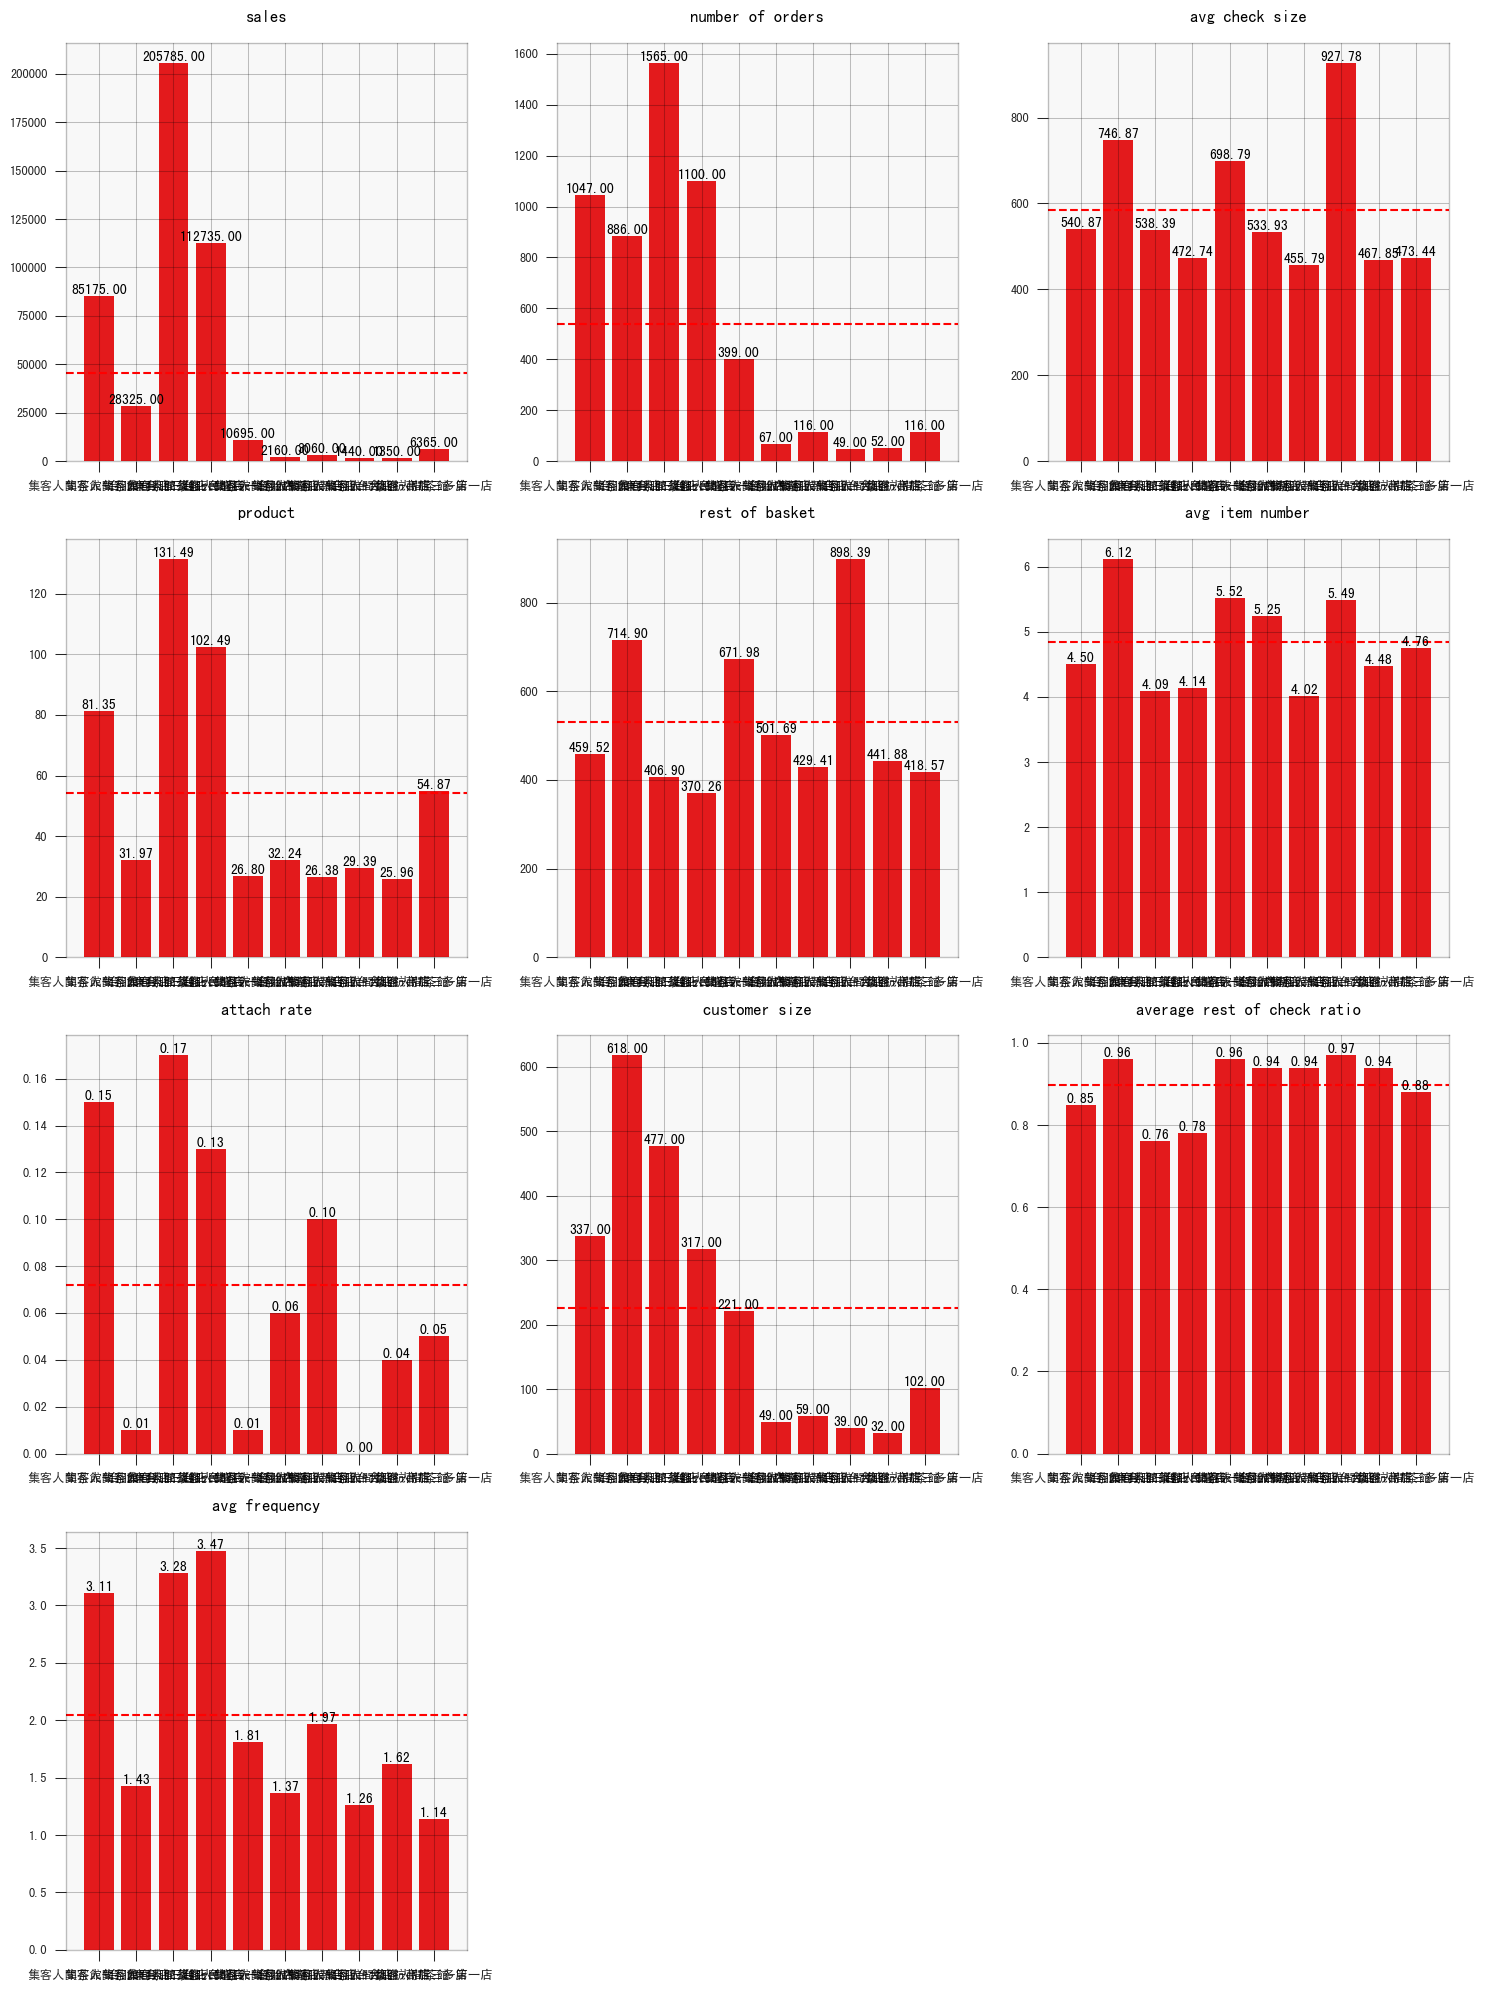

In [472]:
mba.plot_breakdown_metric('分店' , '紅 茶')

In [467]:
mba.plot_assortment_strategy_insight('loyalty')

,滷味拼盤,脆皮炸豆腐,特製毛豆
0,312,346,1065


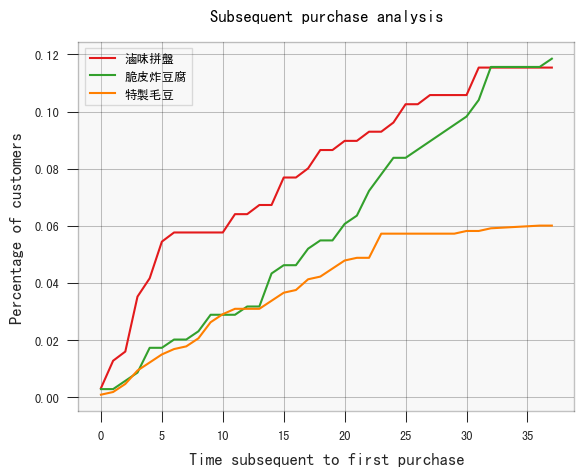

In [321]:
purchase_sequence =  mba.plot_trigger_loyalty_items(following_items = ['滷味拼盤' , '脆皮炸豆腐' , '特製毛豆'] , method ='track')

In [509]:
item_combinations = [[' 40套餐'] , ['48元茶點'] , ['28換飲料']]
mba.generate_combo_tag_for_txn(item_combinations , combo_name = 'combo')

Successfully generate combo tag combo for txn_df and basket_df


0
1
2
3


basket_composition,紅 茶,滷味拼盤,脆皮炸豆腐,特製毛豆,other
other,96.825475,85.332949,55.246234,33.162562,146.369245
40套餐,31.113983,87.392905,46.411783,9.883544,102.475666
48元茶點,76.136364,96.218182,46.250000,10.000000,55.861906
28換飲料,40.714286,77.142857,41.777778,24.714286,135.642799


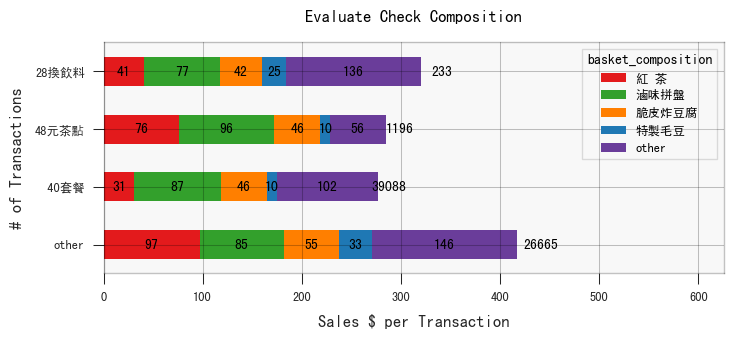

In [515]:
mba.plot_basket_insights(composition_var='combo')

0
1
2
3


basket_composition,紅 茶,滷味拼盤,脆皮炸豆腐,特製毛豆,other
other,96.825475,85.332949,55.246234,33.162562,146.369245
40套餐,31.113983,87.392905,46.411783,9.883544,102.475666
48元茶點,76.136364,96.218182,46.250000,10.000000,55.861906
28換飲料,40.714286,77.142857,41.777778,24.714286,135.642799


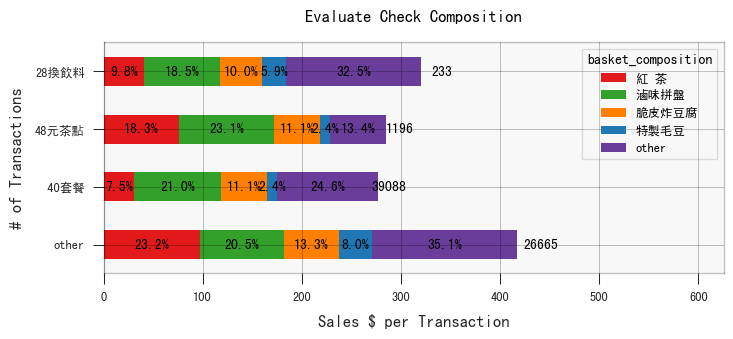

In [510]:
mba.plot_basket_insights(composition_var ='combo' , normalize = True)

0
1


basket_composition,紅 茶,滷味拼盤,脆皮炸豆腐,特製毛豆,other
女,39.256942,80.705650,48.347709,14.712367,119.983727
男,84.146259,97.314879,52.294613,19.702335,116.366302


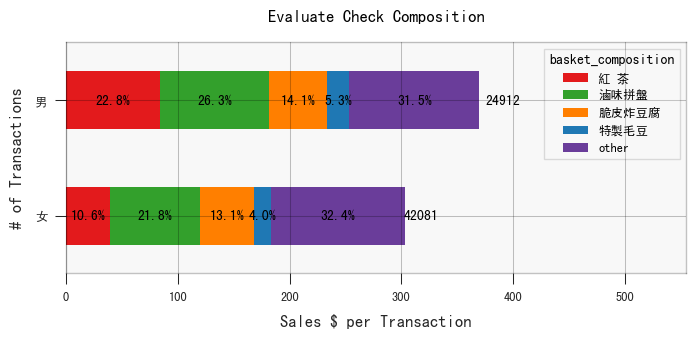

In [482]:
mba.plot_basket_insights(composition_var ='性別' , normalize = True)

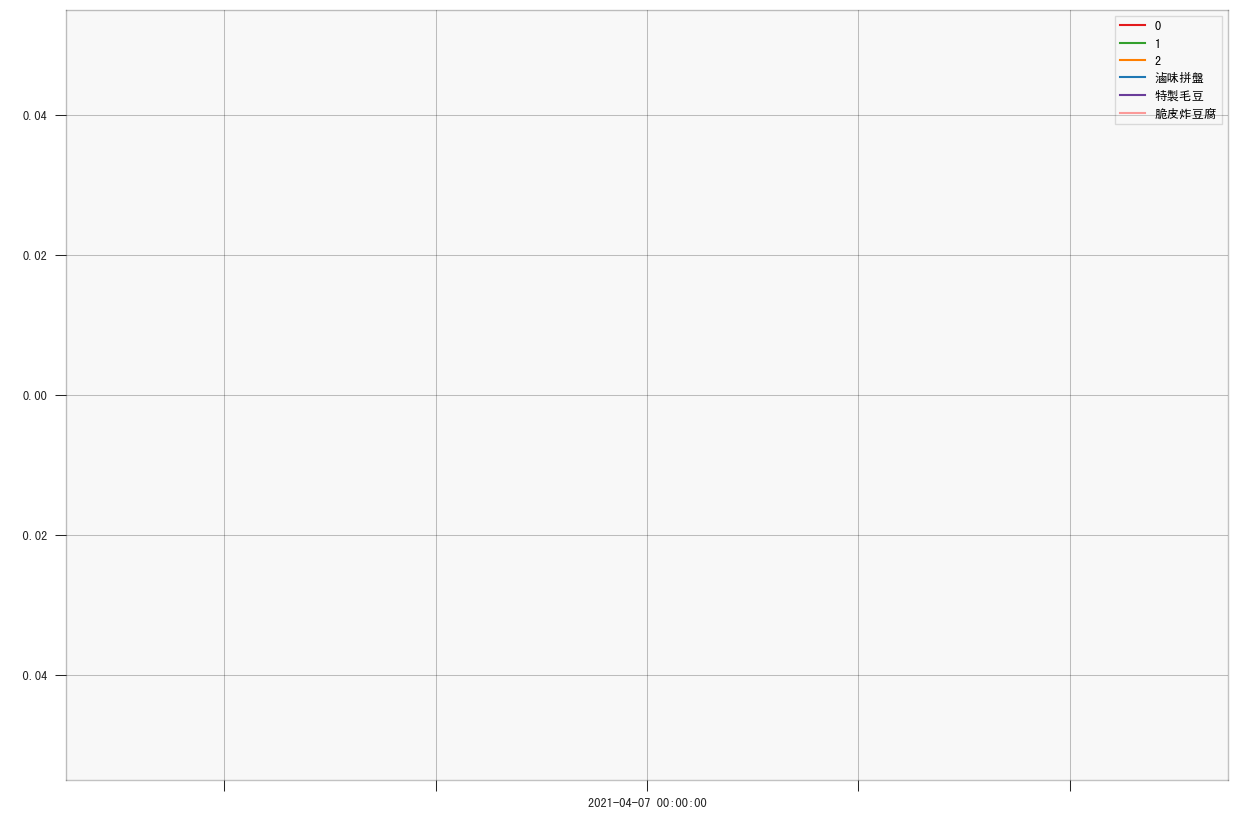

<Axes: xlabel='order_date'>

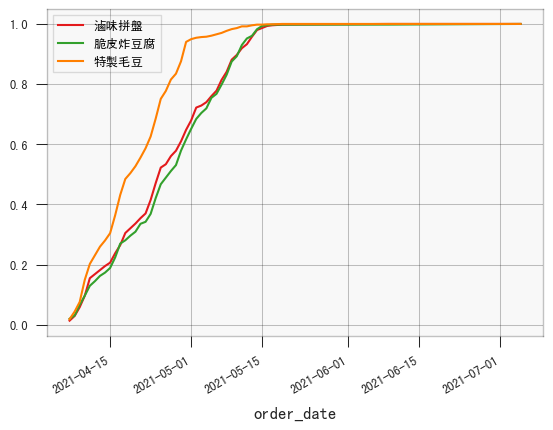

In [256]:
purchase_sequence = purchase_sequence.fillna(0)
(purchase_sequence / purchase_sequence.sum(axis = 0)).cumsum().plot()

<Axes: xlabel='order_date'>

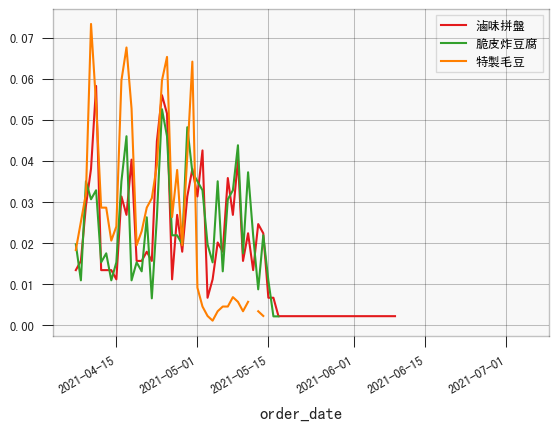

In [229]:
(purchase_sequence / purchase_sequence.sum(axis = 0)).plot()

0
1


basket_composition,紅 茶,滷味拼盤,脆皮炸豆腐,特製毛豆,other
女,39.256942,80.705650,48.347709,14.712367,119.983727
男,84.146259,97.314879,52.294613,19.702335,116.366302


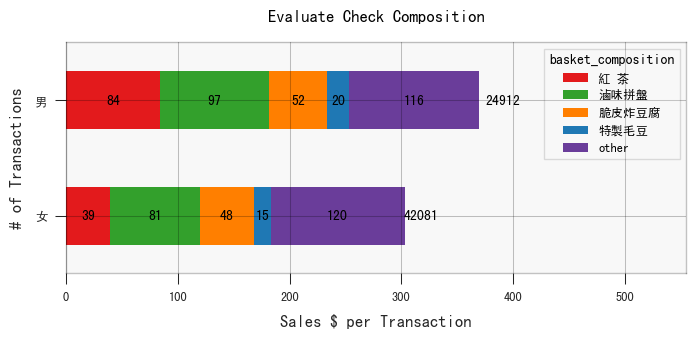

In [477]:
mba.plot_basket_insights(composition_var='性別')

In [480]:
mba.rule_df

,Base Category,Attached Category,Base Category Frequency,Attach Category Frequency,Pair Frequency,Attach Rate,Affinity,leverage,conviction,zhangs_metric
138,珍珠奶茶,40套餐,0.348903,0.581823,0.261171,0.748549,1.286560,0.058172,1.663061,0.342089
139,40套餐,珍珠奶茶,0.581823,0.348903,0.261171,0.448885,1.286560,0.058172,1.181417,0.532629
166,韓式銅盤,40套餐,0.237623,0.581823,0.210428,0.885555,1.522036,0.072174,3.653960,0.449890
167,40套餐,韓式銅盤,0.581823,0.237623,0.210428,0.361671,1.522036,0.072174,1.194332,0.820191
164,雪花牛肉鍋,40套餐,0.166696,0.581823,0.127519,0.764979,1.314798,0.030532,1.779320,0.287322
...,...,...,...,...,...,...,...,...,...,...
32016,40套餐,梅香地瓜條,0.581823,0.001429,0.001012,0.001740,1.217439,0.000181,1.000311,0.427100
30872,40套餐,滷味米血糕,0.581823,0.001444,0.001012,0.001740,1.204888,0.000172,1.000296,0.406639
3583,40套餐,奶油銀絲捲,0.581823,0.001533,0.001012,0.001740,1.134700,0.000120,1.000207,0.283875
41932,40套餐,蒜蓉蘿蔔糕,0.581823,0.001652,0.001012,0.001740,1.052920,0.000051,1.000088,0.120189
